# Analysis of mPower Voice Data

Lets frist find out how many unique helath code we have in the extracted features


In [1]:
# Import pandas for using Data Frames
import pandas as pd
# Import os for working with the files.
import os
# Import numpy for working with the arrays
import numpy as np
# Import date time to convert timestamp to the datetime object
from datetime import datetime

Now lets read the extracted feature file into a dataframe


In [2]:
# Set the file path
features_file_path = os.path.join(os.getcwd(),"voice_feature_extraction.csv")
# Read the file into a DataFrame
features_df = pd.read_csv(features_file_path)
# Display the Dataframe
display (features_df)

,healthCode,audio_audio,medTimepoint,createdOn
0,e518e2ad-5a48-41a7-8143-2997cb32b678,5836266,I don't take Parkinson medications,1435030505000
1,e518e2ad-5a48-41a7-8143-2997cb32b678,5836313,I don't take Parkinson medications,1435031742000
2,e518e2ad-5a48-41a7-8143-2997cb32b678,5832089,I don't take Parkinson medications,1435031768000
3,e5bb566a-9f26-496f-89be-f940162a536c,5837127,Immediately before Parkinson medication,1429368784000
4,e5bb566a-9f26-496f-89be-f940162a536c,5831572,Just after Parkinson medication (at your best),1429376722000
...,...,...,...,...
2360,ffab2631-dfe1-4f5e-bd9e-f763e8aede19,5538484,Immediately before Parkinson medication,1436958549000
2361,ffab2631-dfe1-4f5e-bd9e-f763e8aede19,5545712,Just after Parkinson medication (at your best),1437044762000
2362,ffe9fec0-e3c6-44b2-8b4f-8f6f772b99c3,5910424,Immediately before Parkinson medication,1429866673000
2363,ffe9fec0-e3c6-44b2-8b4f-8f6f772b99c3,5925740,Immediately before Parkinson medication,1430085447000


Frist we need to make some changes in this dataset. We need to change the `medTimepoint` from string label to interger. We also need to remove the data records that the not anotated. We are going to bring them back later when we have the process of clustsering finished to see which group they are belong to:

In [4]:
# Keep tracking of the rows that needed to be removed
labels = []
for index,row in features_df.iterrows():
    if row['medTimepoint'] == "I don't take Parkinson medications":
        features_df.at[index,'medTimepoint'] = 0
    elif row['medTimepoint'] == "Immediately before Parkinson medication":
        features_df.at[index,'medTimepoint'] = 1
    elif row['medTimepoint'] == "Just after Parkinson medication (at your best)":
        features_df.at[index,'medTimepoint'] = 2
    elif row['medTimepoint'] == "Another time":
        features_df.at[index,'medTimepoint'] = 3
    else:
        labels.append(index)
    features_df.at[index,'createdOn'] = datetime.fromtimestamp(row['createdOn']/1000.0)
# Drop all the rows that are not properly annotated
features_df = features_df.drop(labels=labels, axis=0)
# Display the pulished Data frame
display(features_df)

,healthCode,audio_audio,medTimepoint,createdOn
1,e518e2ad-5a48-41a7-8143-2997cb32b678,5836313,0,2015-06-22 23:55:42
2,e518e2ad-5a48-41a7-8143-2997cb32b678,5832089,0,2015-06-22 23:56:08
3,e5bb566a-9f26-496f-89be-f940162a536c,5837127,1,2015-04-18 10:53:04
4,e5bb566a-9f26-496f-89be-f940162a536c,5831572,2,2015-04-18 13:05:22
5,e5bb566a-9f26-496f-89be-f940162a536c,5859991,1,2015-04-19 11:07:19
...,...,...,...,...
2360,ffab2631-dfe1-4f5e-bd9e-f763e8aede19,5538484,1,2015-07-15 07:09:09
2361,ffab2631-dfe1-4f5e-bd9e-f763e8aede19,5545712,2,2015-07-16 07:06:02
2362,ffe9fec0-e3c6-44b2-8b4f-8f6f772b99c3,5910424,1,2015-04-24 05:11:13
2363,ffe9fec0-e3c6-44b2-8b4f-8f6f772b99c3,5925740,1,2015-04-26 17:57:27


Lets Statistically analysie what we have in this dataset:

In [5]:
# Extract the healthCode column as new DataFrame with dropoing the duplicate records.
healthCode_df = pd.DataFrame(data=features_df.healthCode, columns=['healthCode'])
# drop duplicates
healthCode_df= healthCode_df.drop_duplicates()
print(f"1. We have {len(healthCode_df)} healthCode in this dataset.")

HC_cases = len(pd.DataFrame(features_df[features_df['medTimepoint']==0]))
IBPMPD_cases = len(pd.DataFrame(features_df[features_df['medTimepoint']==1]))
JAPMPD_cases = len(pd.DataFrame(features_df[features_df['medTimepoint']==2]))
ATPD_cases = len(pd.DataFrame(features_df[features_df['medTimepoint']==3]))

# Now lets check how many record we have for each group.
print(f"2. Health Control cases: {HC_cases}")
print(f"3. Immediately before Parkinson medication PD cases: {IBPMPD_cases}")
print(f"4. Just after Parkinson medication PD cases: {JAPMPD_cases}")
print(f"5. Another Time PD cases: {ATPD_cases}")

1. We have 68 healthCode in this dataset.
2. Health Control cases: 566
3. Immediately before Parkinson medication PD cases: 438
4. Just after Parkinson medication PD cases: 374
5. Another Time PD cases: 976


Lets display this in a Bar Chart

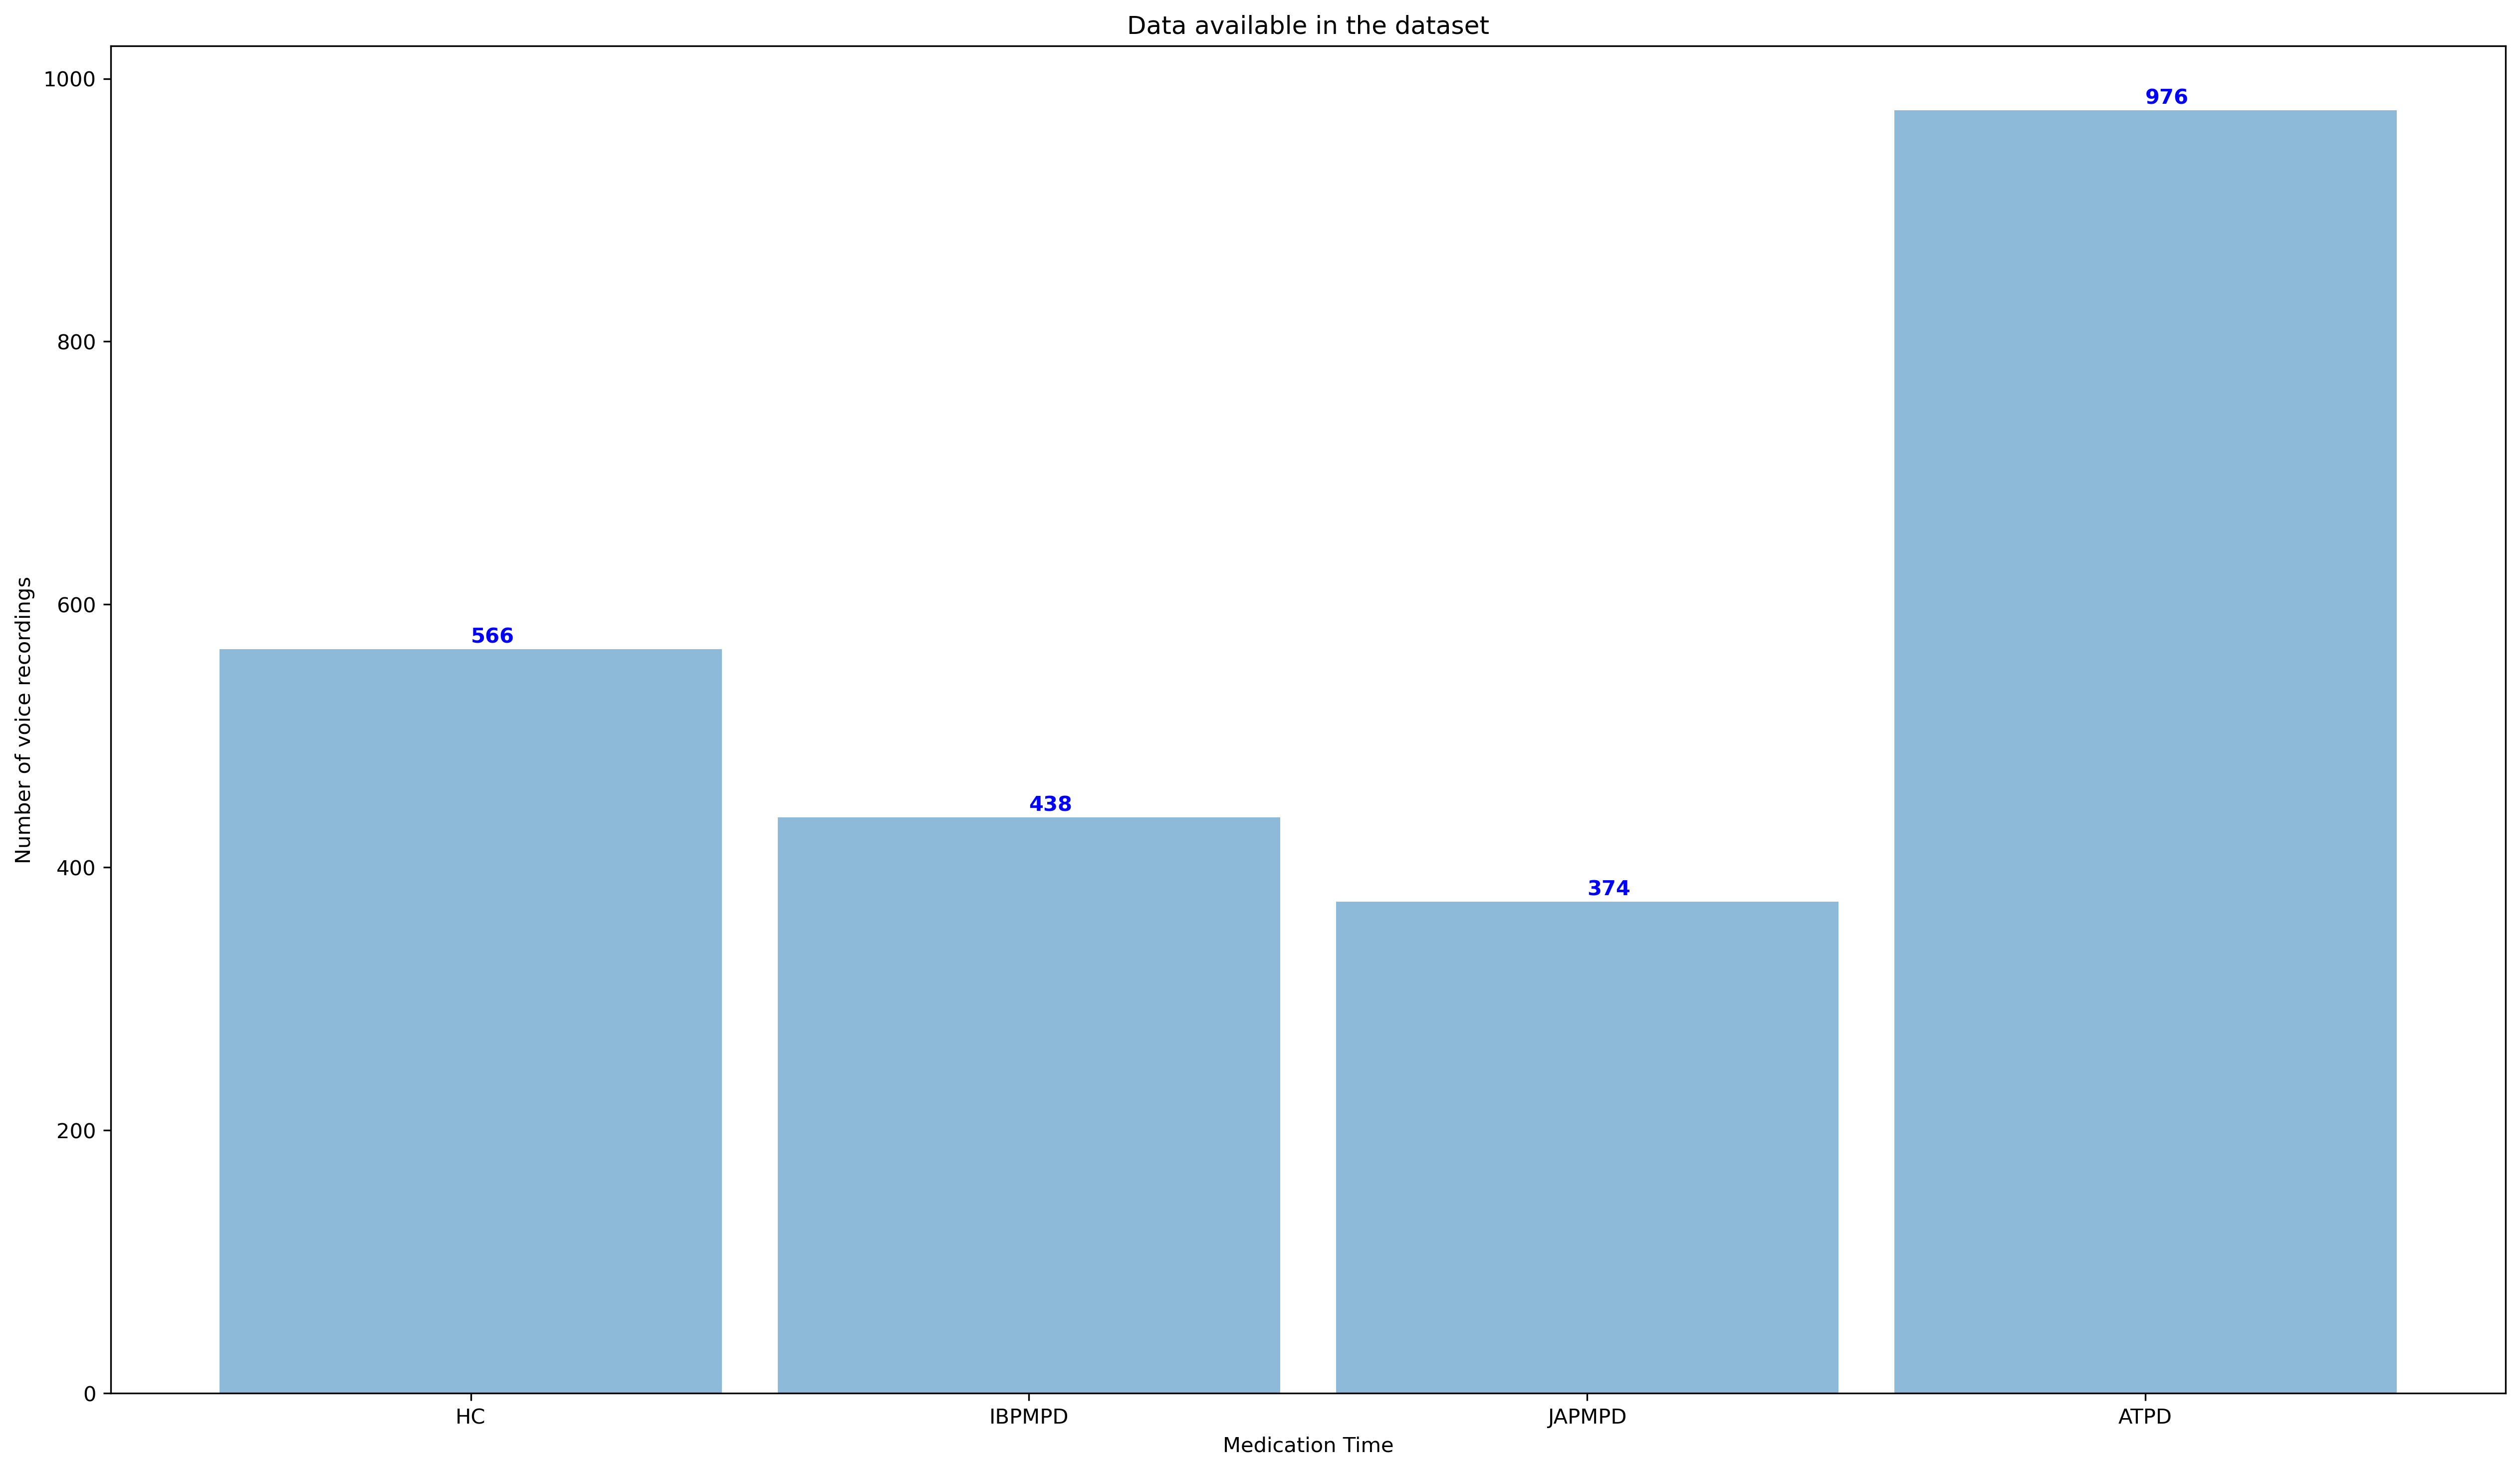

In [6]:
from matplotlib import pyplot as plt
labels = ['HC', 'IBPMPD','JAPMPD','ATPD']
values = [HC_cases, IBPMPD_cases, JAPMPD_cases, ATPD_cases]

fig = plt.figure(figsize=(16, 9), dpi=300)
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(labels, values ,align="center", width=0.9, alpha=0.5)
axes.set_xlabel('Medication Time')
axes.set_ylabel('Number of voice recordings')
axes.set_title("Data available in the dataset")
for i in range(len(values)):
    axes.text(i, values[i] + 5, values[i], color="blue", fontweight="bold")

The length of each recording is 10 seconds. We have segmented each file to 5 audio recording with 2 second length each. Then extracted voice impariment features and formants features for each of the segments. Here is the number of overall features we have:

In [7]:
print(f"Number of overall feature vectors to work with: {len(features_df) * 10}")

Number of overall feature vectors to work with: 23540


Now it is time to load the features and start analysing our data.

In [ ]:
# Start iterating over the dataset
load_features = []
for _,row in features_df.iterrows():
    # Path for the features folder
    try:
        feature_folder_path = os.path.join(os.getcwd(),f"voice_features/{row['audio_audio']}")
    
        file_path = os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_0.npz")
        # Load the ten feature files extraced   5836266_s_f_0.npz
        s_f_0 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_0.npz"))['s_f']
        s_f_0[np.isnan(s_f_0)] = 0
        
        s_f_1 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_1.npz"))['s_f']
        s_f_1[np.isnan(s_f_1)] = 0
        
        s_f_2 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_2.npz"))['s_f']
        s_f_2[np.isnan(s_f_2)] = 0
        
        s_f_3 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_3.npz"))['s_f']
        s_f_3[np.isnan(s_f_3)] = 0
        
        s_f_4 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_4.npz"))['s_f']
        s_f_4[np.isnan(s_f_4)] = 0
        
        f0_0 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_f00.npz"))['f0_f']
        f0_0[np.isnan(f0_0)] = 0
            
        f0_1 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_f01.npz"))['f0_f']
        f0_1[np.isnan(f0_1)] = 0
        
        f0_2 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_f02.npz"))['f0_f']
        f0_2[np.isnan(f0_2)] = 0
        
        f0_3 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_f03.npz"))['f0_f']
        f0_3[np.isnan(f0_3)] = 0

        f0_4 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_f04.npz"))['f0_f']
        f0_4[np.isnan(f0_4)] = 0
        
        # Build an array based on the features
        feature_data_record = [s_f_0,
                                        s_f_1,
                                        s_f_2,
                                        s_f_3,
                                        s_f_4,
                                        f0_0,
                                        f0_1,
                                        f0_2,
                                        f0_3,
                                        f0_4,
                                        row['medTimepoint']
                                       ]
        load_features.append(feature_data_record)
        print(f"Features extracted for {row['audio_audio']}.")
    except Exception as ex:
        print("No feautre find for {row['audio_audio']}.")
    
# Genereate a new DataFrame based on the loaded feature vectors
extracted_features_df = pd.DataFrame(data=load_features, columns=["s_f_0",
                                                       "s_f_1",
                                                       "s_f_2",
                                                       "s_f_3",
                                                       "s_f_4",
                                                       "f0_0",
                                                       "f0_1",
                                                       "f0_2",
                                                       "f0_3",
                                                       "f0_4",
                                                       "label"])

The number of processable data records changed after loading the features. We need to repreat our analysis to see how many data records we have for each group.

In [ ]:
HC_cases = len(pd.DataFrame(extracted_features_df[extracted_features_df['label']==0]))
IBPMPD_cases = len(pd.DataFrame(extracted_features_df[extracted_features_df['label']==1]))
JAPMPD_cases = len(pd.DataFrame(extracted_features_df[extracted_features_df['label']==2]))
ATPD_cases = len(pd.DataFrame(extracted_features_df[extracted_features_df['label']==3]))

# Now lets check how many record we have for each group.
print(f"1. We have {len(extracted_features_df)} data records to be envolved in the data analysis process.")
print(f"2. Health Control cases: {HC_cases}")
print(f"3. Immediately before Parkinson medication PD cases: {IBPMPD_cases}")
print(f"4. Just after Parkinson medication PD cases: {JAPMPD_cases}")
print(f"5. Another Time PD cases: {ATPD_cases}")

labels = ['HC', 'IBPMPD','JAPMPD','ATPD']
values = [HC_cases, IBPMPD_cases, JAPMPD_cases, ATPD_cases]

fig = plt.figure(figsize=(16, 9), dpi=300)
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(labels, values ,align="center", width=0.9, alpha=0.5)
axes.set_xlabel('Medication Time')
axes.set_ylabel('Number of voice recordings')
axes.set_title("Data available in the dataset")
for i in range(len(values)):
    axes.text(i, values[i] + 5, values[i], color="blue", fontweight="bold")

Our observation showed that while most of the cased perform very well in the first few seconds. Based on the severity of their status they voice production process became problematic toward the end. Therefore, even though it is recommended in the lituratures to use the voice recored from seconds two to four; But we intented to use all the segements seperately and repeat our experiments for all of them. Thereupon, this is what we are going to do:

1. **Feature reduction/Feature Selection:** We have heuge number of features _309 imperiment features and 309 f0 feautres for each subject and each segement_ for this experiment. Thus, we need to do feature reduction/feature selection to be able to visualize each data sample. We are intented to use `PCA`, `LDA` and `t-SNE` for this purpose.

2. **Visualization based on different classes:** We beilive basded on the contaniume nature of PD progress. It should be possible to have more than two classes and even more that 5 classes according to the MDS-UPDRS measurement. Thereupon, we will try to visualize each class first. This will be repeated for all of five seperated segments for all the subjects in a group to see what is the difference between the result of visualization in different parts of the recording. This will help us to descide about what we are going to do next. 

# Feature Reduction based on PCA

1. We start the process by centeralizing i.e. normalization of the data. Next step will be applying the PCA and visualizatoin of the priciple components based on their priorites.

In [ ]:
def pca_analysis(data, title , r_components=False, n_components=3):
    """
    Get the input data and analyise it based on PCA. If the `return_components` flage
    set to be False then the function will do a complete analysis and return the results
    as bar charts for decision making. If the `number_of_target_components` is false, 
    then the function calculate the components numbers based on the 
    `number_of_target_components` argument and return the results as pandas DataFrame
    
    :param data: Data to be analyized
    :type data: np.ndarray
    :param title: Title that going to be presented in the plots
    :type title: str
    :param return_components: A falg check if we are doing the analysis or returning
                              the components for furthuer process.
    :type return_components: bool
    :param number_of_target_components: Number of the target components to export
    :type number_of_target_components: int
    :return: Return the result as Pandas Data Frame.
    :rtype: pd.DataFrame
    """
    
    # Import the libraries we need for this function to work properly
    from sklearn import preprocessing
    from sklearn.decomposition import PCA
    import numpy as np
    # Import pandas to have access to the Dataframe
    from pandas import DataFrame
    
    # Make sure the data is in the form of numpy array.
    x_train = np.array(data)
    
    # define a scaler based on the `StandardScaler` which is centering the data and
    # fit the data to the Scaler.
    scaler = preprocessing.StandardScaler().fit(x_train)
    
    # Do the normalization
    scaled_data = np.array(scaler.transform(x_train))
    
    # Shuffled scaled data
    s_scaled_data = scaled_data
    
    if not r_components:
        # Do the analysis and display the results as bar chart
        n_features = len(data[0, :])
        n_samples = len(data)
        
        n_components = min(n_features, n_samples)
        
        # Create a PCA instance based on the number of features
        pca = PCA(n_components=n_components)
        
        # Get the Principal Components
        p_components = pca.fit_transform(scaled_data)
        
        # Plot the explained variances
        features = range(pca.n_components_)
        
        # Import matplot to draw the bar chart
        import matplotlib.pyplot as plt
        
        # We are going to find the number of correct components based on on two
        # approaches. The first approach is to limiting the number of components
        # to capture 90% of total variance. Second based on the shuffled spectrum.
        
        def capture_sum(c_ratio):
            acc_sum = 0
            i = 0
            for item in c_ratio:
                acc_sum += item
                i += 1
                if acc_sum >= 0.9:
                    break
            return i, acc_sum
        
        i, acc_sum = capture_sum(pca.explained_variance_ratio_)
            
        print(f"Target coverage is {acc_sum * 100} and happens when we apply {i} number of componenets.")                
        
                
        # Shuffle Spectrum
        # Get the shape of the transposed data
        s_scaled_data = scaled_data
        
        _, n_rows = s_scaled_data.shape
        
        
        for i in range(n_rows):
            s_scaled_data[:, i] = np.random.permutation(s_scaled_data[:, i])
    
        s_pca = PCA(n_components=n_components)
        sp_components = s_pca.fit_transform(s_scaled_data)
        
        fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=300)
        
        axes.bar(features, pca.explained_variance_ratio_, color='blue')
        axes.set_title(f"Variance Ration of PCA components after shuffle spectrum for {title}")
        axes.set_xlabel('PCA features')
        axes.set_ylabel('Variance %')
        axes.set_xticks(features)
        axes.locator_params(axis='x', nbins=25)
        axes.plot(features, s_pca.explained_variance_ratio_, color='red', lw=0.5)
        
        # Draw the scatter plot based on the first two Principal Components
        pca = PCA(n_components=2)
        
        # Get the Principal Components
        p_components = pca.fit_transform(scaled_data)
        
        p_components = pd.DataFrame(p_components)
        
        fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=300)
        
        axes.scatter(p_components[0], p_components[1], alpha=.1, color='black')
        axes.set_xlabel('PCA 1')
        axes.set_ylabel('PCA 2')
        axes.set_title(f"PCA scatter plot for the two first priciple comonents for {title}")
        
        # Draw the 3-D scatter Plot
        
        from mpl_toolkits.mplot3d.axes3d import Axes3D
        
        fig = plt.figure(figsize=(16,9), dpi=300)
        
        pca = PCA(n_components=3)
        
        # Get the Principal Components
        p_components = pca.fit_transform(scaled_data)
        
        p_components = pd.DataFrame(p_components)

        # Find the 3d Scatter
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.scatter(p_components[0], p_components[1], p_components[2],alpha=.1, color='black')
        ax.set_title(f"PCA 3D scatter plot for the thee first priciple comonents for {title}")
        ax.set_xlabel('PCA 1 - x axies')
        ax.set_ylabel('PCA 2 - y axies')
        ax.set_zlabel('PCA 3 - z axies')
        # Return nothing since the objective is to analyse the data
        return None
    else:
        
        pca = PCA(n_components=n_components)
        p_components = pca.fit_transform(scaled_data)
        
        
        # Return the result of the PCA based on the number of components
        return DataFrame(p_components)

Above implemented function should do the job and give us the analysis results. as it stated before we are going to use the above implemented function to generate the results we are looking for. We start with merging the data of each group separately.

# Healthy Condition Results for first 2 seconds

In [ ]:
# Separate the HC data
data = pd.DataFrame(extracted_features_df[extracted_features_df['label']==0])


data_s_f = np.array(data[data.columns[1]].to_list())

data_s_f.shape

pca_analysis(data_s_f,"Healthy Controls")

print(f"Number of components to be applied based on the shuffle spectrum is 15")

# Before Medication Results  for first 2 seconds

In [ ]:
# Before Medication Results
data = pd.DataFrame(extracted_features_df[extracted_features_df['label']==1])


data_s_f = np.array(data[data.columns[1]].to_list())

pca_analysis(data_s_f,"Before Medication Results  for first 2 seconds")

print(f"Number of components to be applied based on the shuffle spectrum is 15")

# After Medication Results  for first 2 seconds

In [ ]:
# After Medication
data = pd.DataFrame(extracted_features_df[extracted_features_df['label']==2])


data_s_f = np.array(data[data.columns[1]].to_list())

pca_analysis(data_s_f,"After Medication Results for first 2 seconds")

print(f"Number of components to be applied based on the shuffle spectrum is 13")

# Some time in between Results  for first 2 seconds

In [ ]:
# After Medication
data = pd.DataFrame(extracted_features_df[extracted_features_df['label']==3])


data_s_f = np.array(data[data.columns[1]].to_list())

pca_analysis(data_s_f,"Some time in between Results  for first 2 seconds")

print(f"Number of components to be applied based on the shuffle spectrum is 19")

# HC + Best time (After Medication) Results for the second two seconds

In [ ]:
# HC + Best time
data1 = pd.DataFrame(extracted_features_df[extracted_features_df['label']==0])
data2 = pd.DataFrame(extracted_features_df[extracted_features_df['label']==2])
data = pd.concat([data1, data2])


data_s_f = np.array(data[data.columns[1]].to_list())

pca_analysis(data_s_f,"HC + Best time for the second two seconds")

print(f"Number of components to be applied based on the shuffle spectrum is 17")

**Next:** Complete analyse of all the results for all purpostions and compare the resutls.

1. **DBSCAN** clustering and analyse the results.
1. **Partitioning** clustering and analyse the results. 
1. **t-SNE** base feature reduction and visualize the result.
   1. **DBSCAN** clustering and analyse the results.
   1. **Partitioning** clustering and analyse the results. 
